#VC USED


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('India-disability-data(cleaned).csv')
df.head()

,State Code,Area Name,Total/ Rural/Urban,Disability,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
0,0,INDIA,Total,Total,Total,26814994,14988593,11826401,6982009,5464857,1517152,17070608,7915768,9154840
1,0,INDIA,Total,Total,0-14,5572336,3073214,2499122,100779,61870,38909,5344297,2942702,2401595
2,0,INDIA,Total,Total,15-59,15728243,9125226,6603017,5808809,4559220,1249589,7785245,3317990,4467255
3,0,INDIA,Total,Total,60+,5376619,2713995,2662624,1036384,816764,219620,3854887,1614909,2239978
4,0,INDIA,Total,Total,Age not stated,137796,76158,61638,36037,27003,9034,86179,40167,46012


In [30]:
p=pd.read_csv('India-disability-data(cleaned).csv')

In [31]:
df.head()
df = df[df['Area Name'] != 'INDIA'] 
df = df[df['Total/ Rural/Urban'] != 'Total']
df = df[df['Disability'] != 'Total']
df = df[df['Age-group'] != 'Total']
df.head()

df.reset_index(drop=True, inplace=True)
df

# df['Area Name'] = df['Area Name'][1]



# df = df.drop('Total disabled population - Persons', axis=1)
df = df.drop('State Code', axis=1)
df

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['total/rural/urban_encoded'] = label_encoder.fit_transform(df['Total/ Rural/Urban'])

# Drop the original 'total/rural/urban' column after encoding
df.drop('Total/ Rural/Urban', axis=1, inplace=True)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Age-group Encoded'] = label_encoder.fit_transform(df['Age-group'])
df.drop('Age-group', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Area Name Encoded'] = label_encoder.fit_transform(df['Area Name'])
df.drop('Area Name', axis=1, inplace=True)
df

,Disability,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females,total/rural/urban_encoded,Age-group Encoded,Area Name Encoded
0,In-Seeing,10502,5720,4782,73,44,29,10027,5442,4585,0,0,13
1,In-Seeing,23093,12785,10308,6090,5450,640,11035,3807,7228,0,1,13
2,In-Seeing,16496,8482,8014,1953,1779,174,12186,5141,7045,0,2,13
3,In-Seeing,51,32,19,8,8,0,38,22,16,0,3,13
4,In-Hearing,12461,6652,5809,122,91,31,11994,6393,5601,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Any-Other,0,0,0,0,0,0,0,0,0,1,3,0
2236,Multiple-Disability,60,37,23,1,1,0,59,36,23,1,0,0
2237,Multiple-Disability,88,53,35,15,15,0,71,37,34,1,1,0
2238,Multiple-Disability,17,8,9,2,2,0,15,6,9,1,2,0


In [32]:
label_encoder = LabelEncoder()
df['Disability Encoded'] = label_encoder.fit_transform(df['Disability'])
df.drop('Disability', axis=1, inplace=True)
df

,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females,total/rural/urban_encoded,Age-group Encoded,Area Name Encoded,Disability Encoded
0,10502,5720,4782,73,44,29,10027,5442,4585,0,0,13,3
1,23093,12785,10308,6090,5450,640,11035,3807,7228,0,1,13,3
2,16496,8482,8014,1953,1779,174,12186,5141,7045,0,2,13,3
3,51,32,19,8,8,0,38,22,16,0,3,13,3
4,12461,6652,5809,122,91,31,11994,6393,5601,0,0,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0,0,0,1,3,0,0
2236,60,37,23,1,1,0,59,36,23,1,0,0,7
2237,88,53,35,15,15,0,71,37,34,1,1,0,7
2238,17,8,9,2,2,0,15,6,9,1,2,0,7


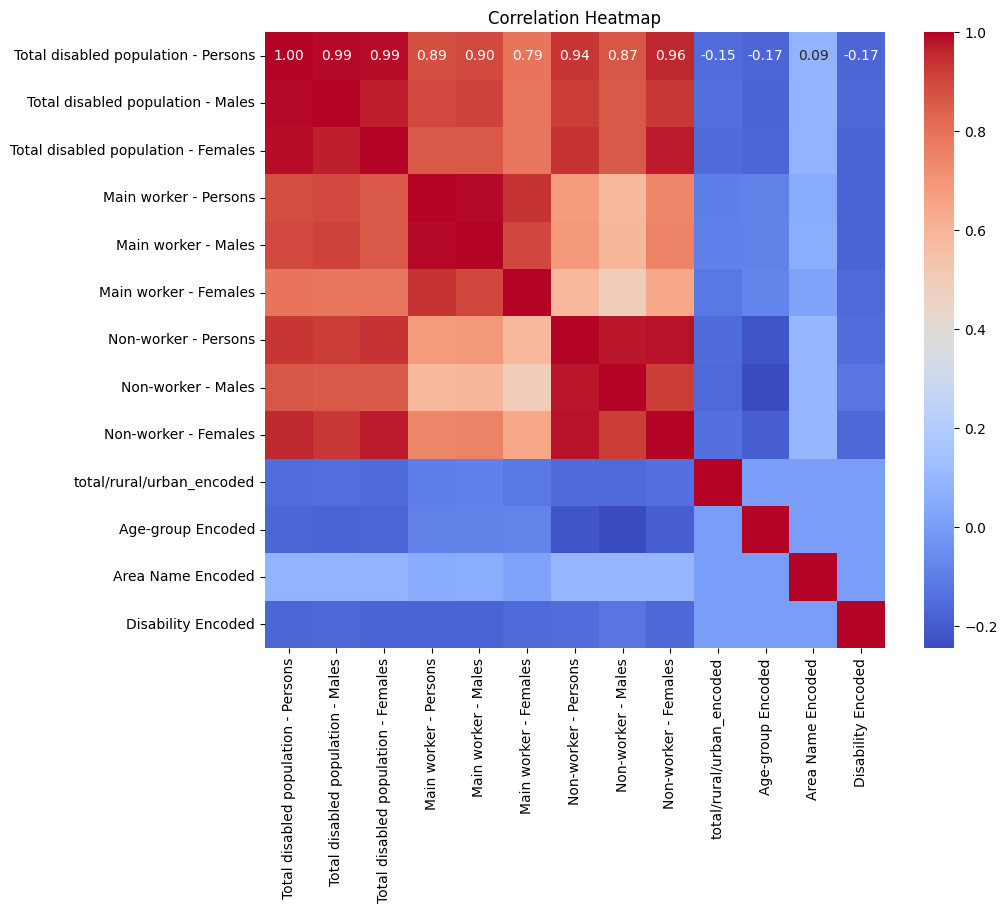

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\Keerthana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Keerthana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Keerthana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


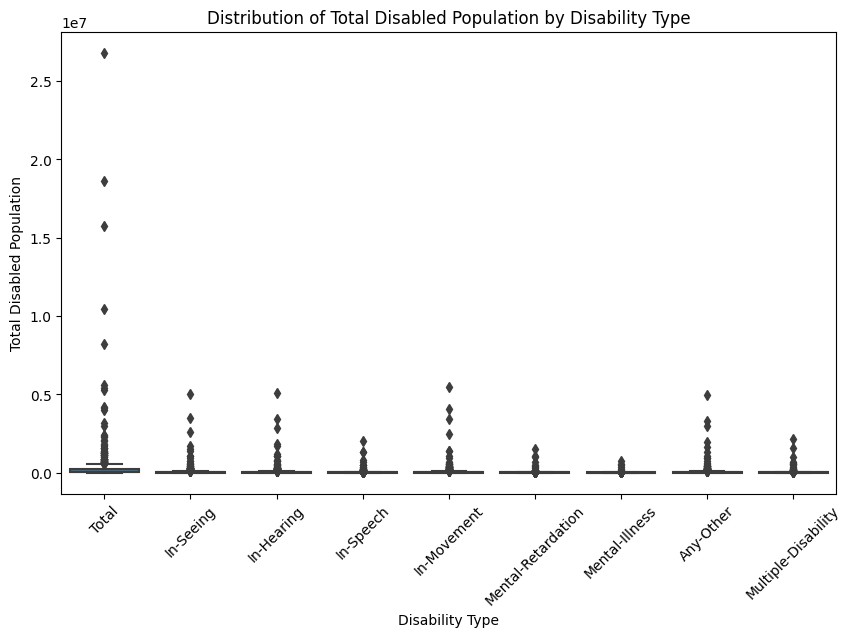

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Disability', y='Total disabled population - Persons', data=p)
plt.title('Distribution of Total Disabled Population by Disability Type')
plt.xlabel('Disability Type')
plt.ylabel('Total Disabled Population')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Splitting into features and target variable
X = df.drop(['Disability Encoded'], axis=1)  # Features
y = df['Disability Encoded']  # Target variable
X


,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females,total/rural/urban_encoded,Age-group Encoded,Area Name Encoded
0,10502,5720,4782,73,44,29,10027,5442,4585,0,0,13
1,23093,12785,10308,6090,5450,640,11035,3807,7228,0,1,13
2,16496,8482,8014,1953,1779,174,12186,5141,7045,0,2,13
3,51,32,19,8,8,0,38,22,16,0,3,13
4,12461,6652,5809,122,91,31,11994,6393,5601,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0,0,0,1,3,0
2236,60,37,23,1,1,0,59,36,23,1,0,0
2237,88,53,35,15,15,0,71,37,34,1,1,0
2238,17,8,9,2,2,0,15,6,9,1,2,0


In [36]:
X

,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females,total/rural/urban_encoded,Age-group Encoded,Area Name Encoded
0,10502,5720,4782,73,44,29,10027,5442,4585,0,0,13
1,23093,12785,10308,6090,5450,640,11035,3807,7228,0,1,13
2,16496,8482,8014,1953,1779,174,12186,5141,7045,0,2,13
3,51,32,19,8,8,0,38,22,16,0,3,13
4,12461,6652,5809,122,91,31,11994,6393,5601,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0,0,0,1,3,0
2236,60,37,23,1,1,0,59,36,23,1,0,0
2237,88,53,35,15,15,0,71,37,34,1,1,0
2238,17,8,9,2,2,0,15,6,9,1,2,0


In [37]:
y

0       3
1       3
2       3
3       3
4       1
       ..
2235    0
2236    7
2237    7
2238    7
2239    7
Name: Disability Encoded, Length: 2240, dtype: int32

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.head()

,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females,total/rural/urban_encoded,Age-group Encoded,Area Name Encoded
792,970,504,466,28,17,11,828,431,397,0,0,23
1271,31,20,11,1,1,0,28,18,10,1,3,14
1538,33,17,16,8,8,0,24,9,15,0,2,8
668,250,123,127,3,2,1,238,113,125,0,0,29
1975,0,0,0,0,0,0,0,0,0,1,3,17


In [40]:
X_test.head()

,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females,total/rural/urban_encoded,Age-group Encoded,Area Name Encoded
324,14669,7883,6786,202,118,84,14174,7615,6559,0,0,11
96,292,173,119,5,5,0,285,167,118,1,0,12
2104,22424,11976,10448,448,275,173,21416,11388,10028,1,0,30
1259,124,56,68,27,21,6,88,28,60,1,3,14
1061,1007,589,418,490,384,106,465,180,285,1,1,21


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.1875


In [43]:
from sklearn.metrics import accuracy_score
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.12946428571428573


In [44]:
y_train

792     0
1271    5
1538    3
668     7
1975    5
       ..
1638    1
1095    1
1130    4
1294    2
860     7
Name: Disability Encoded, Length: 1792, dtype: int32

C:\Users\Keerthana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Keerthana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Keerthana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Keerthana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

AttributeError: 'numpy.int32' object has no attribute 'startswith'

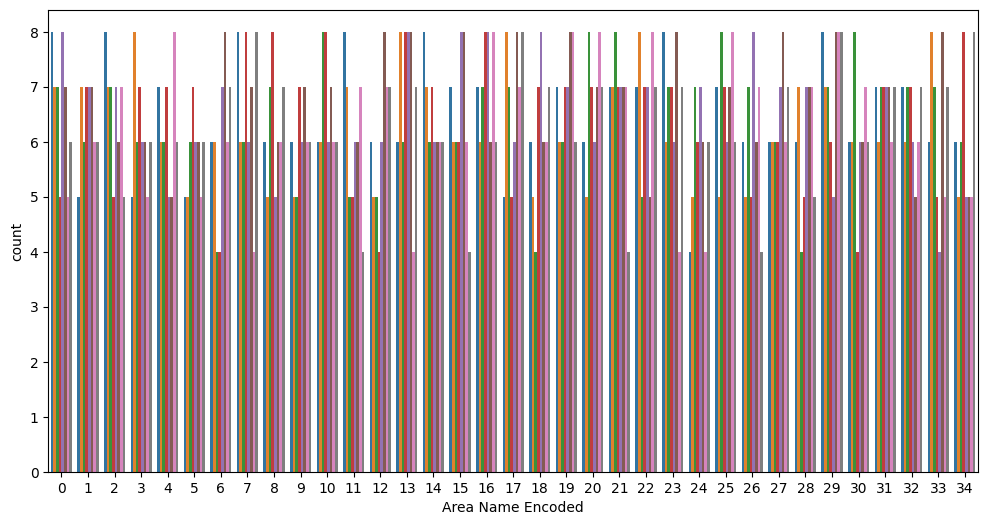

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Area Name Encoded', hue=y_train, data=X_train)
plt.title('Count of Disabilities by Area')
plt.xlabel('Area Name Encoded')
plt.show()


C:\Users\Keerthana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Keerthana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Keerthana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Keerthana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

AttributeError: 'numpy.int32' object has no attribute 'startswith'

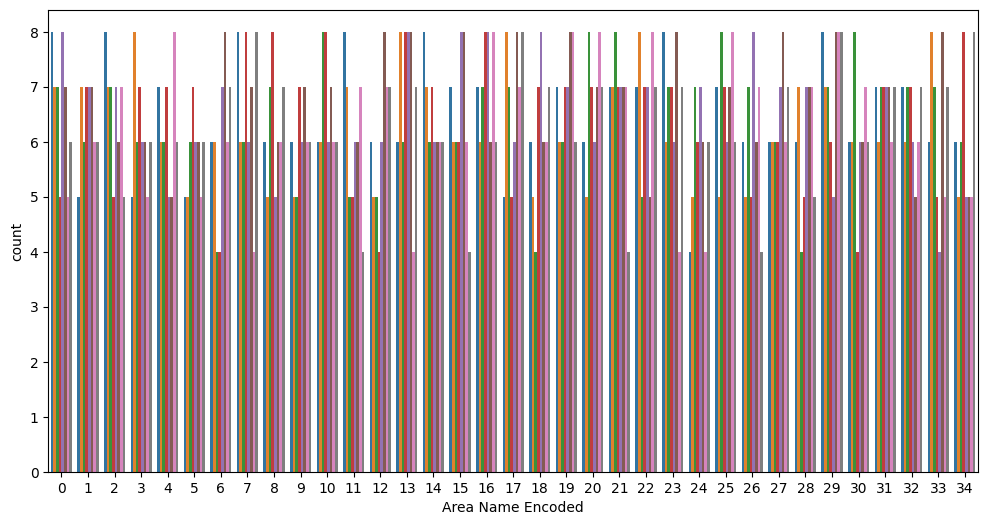

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Area Name Encoded', hue=y_train, data=pd.concat([X_train, y_train], axis=1))
plt.title('Count of Disabilities by Area')
plt.xlabel('Area Name Encoded')
plt.legend(title='Disability')  # Optionally set legend title
plt.show()


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [49]:

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)

C:\Users\Keerthana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [50]:
voting_clf.predict(X_test[:10])

array([0, 2, 7, 0, 0, 2, 5, 7, 0, 5])

In [51]:
ypred=voting_clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score as ac

In [53]:
print(ac(ypred,y_test))

0.21428571428571427


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have a trained voting classifier model named 'voting_clf' and test data 'X_test', 'y_test'
y_pred = voting_clf.predict(X_test)

# Precision (example with 'macro' averaging)
precision = precision_score(y_test, y_pred, average='macro')

# Recall (example with 'macro' averaging)
recall = recall_score(y_test, y_pred, average='macro')

# F1 Score (example with 'macro' averaging)
f1 = f1_score(y_test, y_pred, average='macro')



# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Precision: 0.19730897617267507
Recall: 0.22443113537555476
F1 Score: 0.18200204315391588
Confusion Matrix:
 [[21  6  3  8  2  9  0  4]
 [22  8  4 17  0  9  1  1]
 [12  4 24  6  0 10  0  2]
 [12 14  9 14  1  5  1  0]
 [23  5  9  3  1 13  0  0]
 [ 1  3 11  5  2 20  1  1]
 [ 6  0 15  9  1 27  0  3]
 [ 7  1 23  8  1 12  0  8]]
